In [3]:
import pandas as pd
import seaborn as sns
from seaborn.relational import lineplot
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
sns.set_theme(context='talk', style="whitegrid")
import os
import glob
import json
import ast
from operator import le
data = pd.read_csv(r"DiaryFormResponses.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 11 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                               298 non-null    object
 1   Participant Id                                                                                                          298 non-null    int64 
 2   Which chat applications did you search in?                                                                              298 non-null    object
 3   Can you share the query text you typed in your chat application Search Textbox? This question is Optional.              163 non-null    object
 4   Wh

In [5]:
demographics_cols = {'Participant Id':'Id',
                     'Which chat applications did you search in?':'Applications',
                     'Can you share the query text you typed in your chat application Search Textbox? This question is Optional.':'Query',
                     'What was your search intent when issuing this query to search your historical chat?':'Search Intent', 
                     'What chat objects satisfied your search intents when you used the search function?':'Chat Search Objects',
                     'How did you search your previous chat conversations?':'Search Methods',
                     'How were the results displayed when you performed this search? ':'Displayed Results',
                     'How satisfied were you with the results being displayed in that way?':'Result Display User Satisfaction',
                     'How satisfied were you with the quality of the search results?':'Search Quality',
                     "How satisfied were you with the chat application's search experience (including quality, speed, interface (UI), etc.)?":'Search Experience'
                     }
data.rename(columns=demographics_cols, inplace=True)
data[demographics_cols.values()]

,Id,Applications,Query,Search Intent,Chat Search Objects,Search Methods,Displayed Results,Result Display User Satisfaction,Search Quality,Search Experience
0,123,Slack,“Gift contributions”,Refresh memory about what was said/discussed,Thread of conversation,Keywords within a textbox with operators such ...,Got nothing!,5,1,5
1,119,MS Teams,"""has moved their audit into a status of Review""",Question-answering,Specific keywords or phrases mentioned in the ...,Keywords within a textbox with operators such ...,"A list of individual messages, in relevance/be...",7,7,6
2,119,MS Teams,"""people matter survey""",Refresh memory about what was said/discussed,Thread of conversation,Keywords within a textbox,"A list of individual messages, in relevance/be...",3,4,6
3,121,Slack,@andrew ta,Assigned tasks to members,Thread of conversation,Keywords within a textbox with operators such ...,"A list of individual messages, in relevance/be...",5,2,2
4,123,Slack,@Tamer,Resources,A URL link,Manually e.g. scrolling up and down,"A list of individual messages, in chronologica...",4,3,4
...,...,...,...,...,...,...,...,...,...,...
293,126,Slack,NaN,Work / Social announcements,Thread of conversation,Keywords within a textbox,"A list of individual messages, in chronologica...",6,6,6
294,126,Slack,NaN,Refresh memory about what was said/discussed,Thread of conversation,Natural language phrase/questions,"A list of individual messages, in relevance/be...",4,2,3
295,126,Slack,NaN,"Entities (e.g. People, Brands, places, Movies)",Text messages.,Natural language phrase/questions,"A list of individual messages, in relevance/be...",4,3,3
296,126,Slack,NaN,"Entities (e.g. People, Brands, places, Movies)",Thread of conversation,Natural language phrase/questions,"A list of individual messages, in relevance/be...",2,2,3


In [96]:


# Perform the analysis again
# Calculate the number of entries
num_entries = len(data)

# Calculate average entries per participant (min, max, SD)
entries_per_participant = data['Id'].value_counts()
avg_entries_per_participant = entries_per_participant.mean()
min_entries_per_participant = entries_per_participant.min()
max_entries_per_participant = entries_per_participant.max()
std_entries_per_participant = entries_per_participant.std()

# Calculate average length of query
data['Query_Length'] = data['Query'].str.len()
avg_query_length = data['Query_Length'].mean()

# Create a table that breaks down entries by search intents
search_intent_table = data.groupby('Search Intent').agg(
    query_example=('Query', 'first'),  # First query example for each intent
    percent_of_total_entries=('Id', lambda x: (len(x) / num_entries) * 100),  # % of total diary entries
    num_search_intents=('Id', 'size'),  # Number of search intents
    num_participants=('Id', 'nunique')  # Number of unique participants reporting this search intent
).reset_index()

# Display the calculated metrics and the table
num_entries, avg_entries_per_participant, min_entries_per_participant, max_entries_per_participant, std_entries_per_participant, avg_query_length, search_intent_table.head()


(22,
 2.4444444444444446,
 1,
 5,
 1.509230856356236,
 13.047619047619047,
                                     Search Intent          query_example  \
 0  Entities (e.g. People, Brands, places, Movies)  Business phone number   
 1    Refresh memory about what was said/discussed                pairwis   
 2                                       Resources   sigir-ap submissions   
 3        The title of the paper we have discussed                  paper   
 4                     Work / Social announcements                predict   
 
    percent_of_total_entries  num_search_intents  num_participants  
 0                 13.636364                   3                 3  
 1                 40.909091                   9                 4  
 2                 36.363636                   8                 5  
 3                  4.545455                   1                 1  
 4                  4.545455                   1                 1  )

In [97]:
# Create a table that breaks down entries by Chat Search Objects
chat_object_table = data.groupby('Chat Search Objects').agg(
    query_example=('Query', 'first'),  # First query example for each Chat Object
    percent_of_total_entries=('Id', lambda x: (len(x) / num_entries) * 100),  # % of total diary entries
    num_diary_entries=('Id', 'size'),  # Number of diary entries for each Chat Search Object
    num_participants=('Id', 'nunique')  # Number of unique participants reporting this Chat Search Object
).reset_index()

# Generate the LaTeX code for the table
latex_table_chat_object = chat_object_table.to_latex(index=False, float_format="%.2f")
chat_object_table.head(), latex_table_chat_object


(                                 Chat Search Objects          query_example  \
 0                                         A document   sigir-ap submissions   
 1  Specific keywords or phrases mentioned in the ...       Equipment sizing   
 2                                     Text messages.                pairwis   
 3                             Thread of conversation  Business phone number   
 
    percent_of_total_entries  num_diary_entries  num_participants  
 0                 27.272727                  6                 4  
 1                 22.727273                  5                 5  
 2                 18.181818                  4                 3  
 3                 31.818182                  7                 5  ,
 '\\begin{tabular}{llrrr}\n\\toprule\nChat Search Objects & query_example & percent_of_total_entries & num_diary_entries & num_participants \\\\\n\\midrule\nA document & sigir-ap submissions & 27.27 & 6 & 4 \\\\\nSpecific keywords or phrases mentioned in th

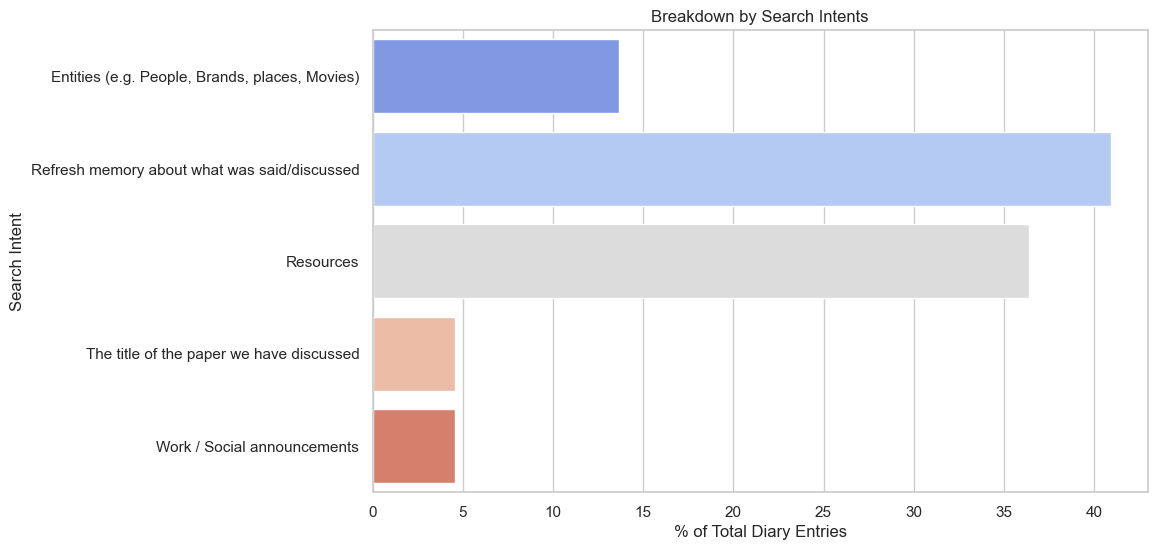

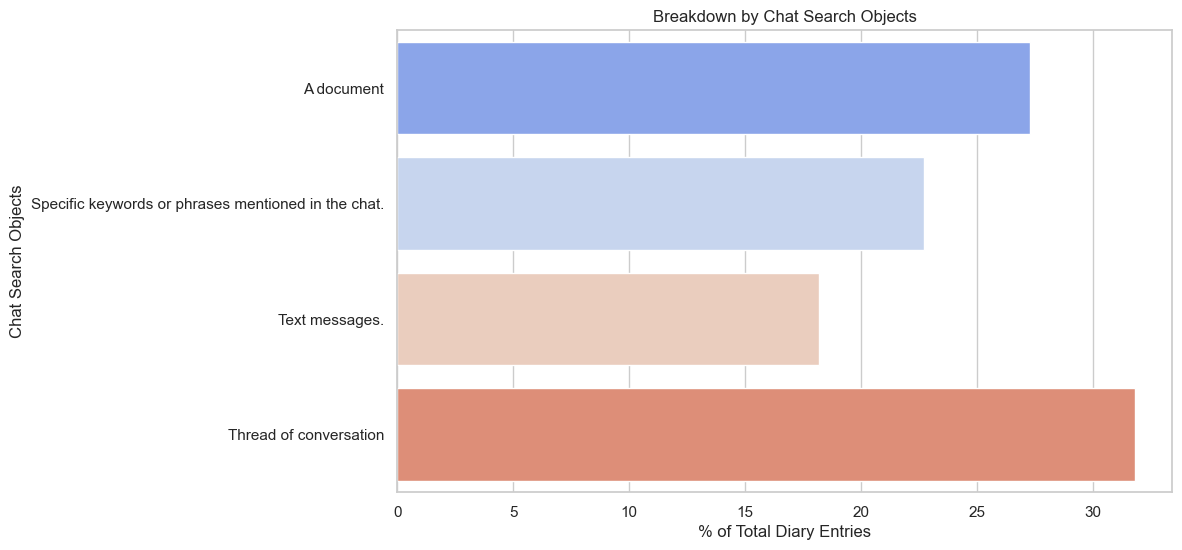

['search_intent_breakdown.csv', 'chat_object_breakdown.csv']

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create bar plots for the breakdown by Search Intents and Chat Search Objects

# Bar plot for Search Intents
plt.figure(figsize=(10, 6))
sns.barplot(x='percent_of_total_entries', y='Search Intent', data=search_intent_table, palette="coolwarm")
plt.title('Breakdown by Search Intents')
plt.xlabel('% of Total Diary Entries')
plt.ylabel('Search Intent')
plt.show()

# Bar plot for Chat Search Objects
plt.figure(figsize=(10, 6))
sns.barplot(x='percent_of_total_entries', y='Chat Search Objects', data=chat_object_table, palette="coolwarm")
plt.title('Breakdown by Chat Search Objects')
plt.xlabel('% of Total Diary Entries')
plt.ylabel('Chat Search Objects')
plt.show()

# Export the tables to CSV files
search_intent_table.to_csv('search_intent_breakdown.csv', index=False)
chat_object_table.to_csv('chat_object_breakdown.csv', index=False)

# Return paths to the exported CSV files
exported_files = ['search_intent_breakdown.csv', 'chat_object_breakdown.csv']
exported_files


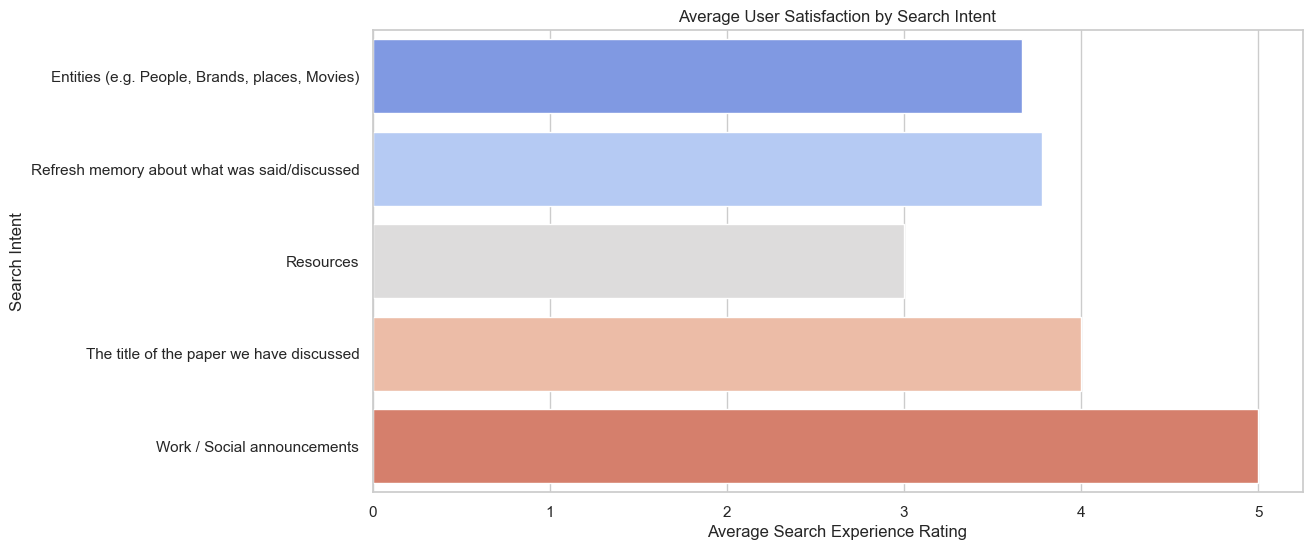

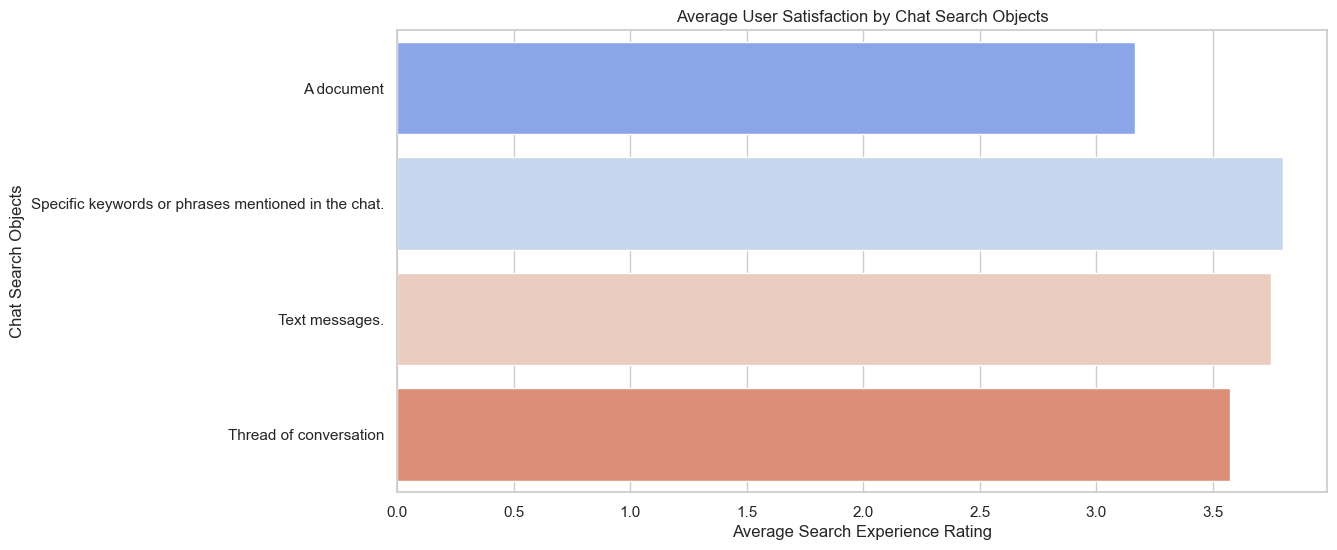

(                                    Search Intent  \
 0  Entities (e.g. People, Brands, places, Movies)   
 1    Refresh memory about what was said/discussed   
 2                                       Resources   
 3        The title of the paper we have discussed   
 4                     Work / Social announcements   
 
    avg_result_display_satisfaction  avg_search_quality  avg_search_experience  
 0                         3.666667            4.000000               3.666667  
 1                         3.555556            3.444444               3.777778  
 2                         3.375000            2.750000               3.000000  
 3                         3.000000            3.000000               4.000000  
 4                         5.000000            4.000000               5.000000  ,
                                  Chat Search Objects  \
 0                                         A document   
 1  Specific keywords or phrases mentioned in the ...   
 2              

In [100]:
# User Satisfaction Analysis: Breakdown by Search Intents and Chat Search Objects

# Average User Satisfaction by Search Intent
avg_satisfaction_by_intent = data.groupby('Search Intent').agg(
    avg_result_display_satisfaction=('Result Display User Satisfaction', 'mean'),
    avg_search_quality=('Search Quality', 'mean'),
    avg_search_experience=('Search Experience', 'mean')
).reset_index()

# Average User Satisfaction by Chat Search Objects
avg_satisfaction_by_object = data.groupby('Chat Search Objects').agg(
    avg_result_display_satisfaction=('Result Display User Satisfaction', 'mean'),
    avg_search_quality=('Search Quality', 'mean'),
    avg_search_experience=('Search Experience', 'mean')
).reset_index()

# Create bar plots for Average User Satisfaction by Search Intents and Chat Search Objects

# Bar plot for Average User Satisfaction by Search Intent
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_search_experience', y='Search Intent', data=avg_satisfaction_by_intent, palette="coolwarm")
plt.title('Average User Satisfaction by Search Intent')
plt.xlabel('Average Search Experience Rating')
plt.ylabel('Search Intent')
plt.show()

# Bar plot for Average User Satisfaction by Chat Search Objects
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_search_experience', y='Chat Search Objects', data=avg_satisfaction_by_object, palette="coolwarm")
plt.title('Average User Satisfaction by Chat Search Objects')
plt.xlabel('Average Search Experience Rating')
plt.ylabel('Chat Search Objects')
plt.show()

# Export the tables to CSV files
avg_satisfaction_by_intent.to_csv('avg_satisfaction_by_intent.csv', index=False)
avg_satisfaction_by_object.to_csv('avg_satisfaction_by_object.csv', index=False)

# Return paths to the exported CSV files
exported_satisfaction_files = ['avg_satisfaction_by_intent.csv', 'avg_satisfaction_by_object.csv']
avg_satisfaction_by_intent.head(), avg_satisfaction_by_object.head(), exported_satisfaction_files


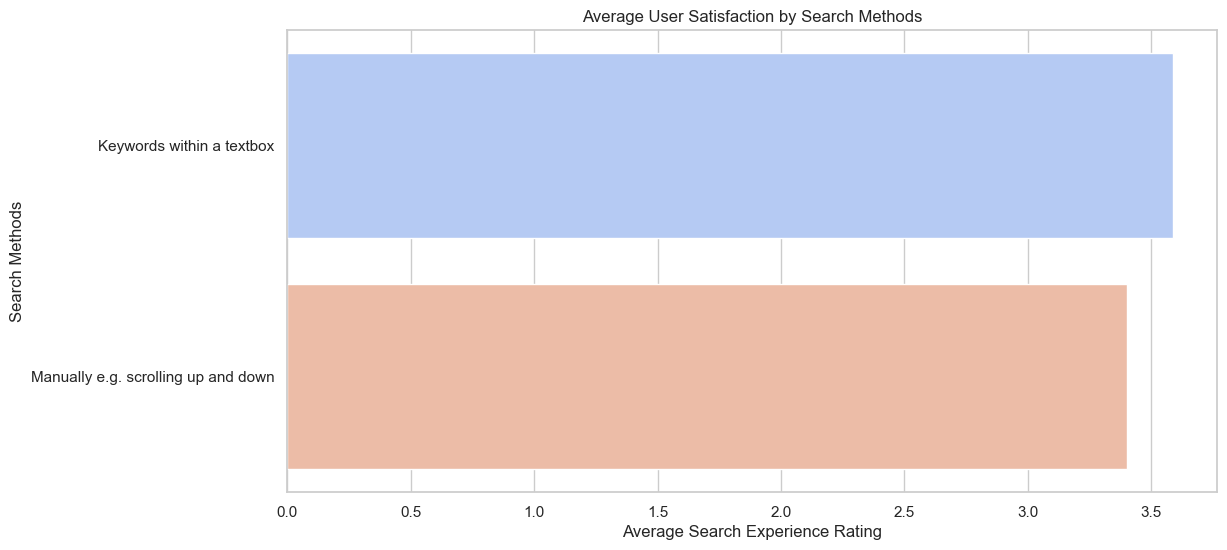

(                        Search Methods  \
 0            Keywords within a textbox   
 1  Manually e.g. scrolling up and down   
 
                                        query_example  \
 0                               sigir-ap submissions   
 1  Godilock TAR; Active Learning systematical review   
 
    percent_of_total_entries  num_diary_entries  num_participants  
 0                 77.272727                 17                 8  
 1                 22.727273                  5                 4  ,
 '\\begin{tabular}{llrrr}\n\\toprule\nSearch Methods & query_example & percent_of_total_entries & num_diary_entries & num_participants \\\\\n\\midrule\nKeywords within a textbox & sigir-ap submissions & 77.27 & 17 & 8 \\\\\nManually e.g. scrolling up and down & Godilock TAR; Active Learning systematical review & 22.73 & 5 & 4 \\\\\n\\bottomrule\n\\end{tabular}\n',
 ['search_method_breakdown.csv', 'avg_satisfaction_by_method.csv'])

In [101]:
# Calculate the number of entries for the lambda function
num_entries = len(data)

# Create a table that breaks down entries by Search Methods
search_method_table = data.groupby('Search Methods').agg(
    query_example=('Query', 'first'),  # First query example for each Search Method
    percent_of_total_entries=('Id', lambda x: (len(x) / num_entries) * 100),  # % of total diary entries
    num_diary_entries=('Id', 'size'),  # Number of diary entries for each Search Method
    num_participants=('Id', 'nunique')  # Number of unique participants reporting this Search Method
).reset_index()

# Generate the LaTeX code for the table
latex_table_search_method = search_method_table.to_latex(index=False, float_format="%.2f")

# Create a bar plot for Average User Satisfaction by Search Methods
avg_satisfaction_by_method = data.groupby('Search Methods').agg(
    avg_result_display_satisfaction=('Result Display User Satisfaction', 'mean'),
    avg_search_quality=('Search Quality', 'mean'),
    avg_search_experience=('Search Experience', 'mean')
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='avg_search_experience', y='Search Methods', data=avg_satisfaction_by_method, palette="coolwarm")
plt.title('Average User Satisfaction by Search Methods')
plt.xlabel('Average Search Experience Rating')
plt.ylabel('Search Methods')
plt.show()

# Export the tables to CSV files
search_method_table.to_csv('search_method_breakdown.csv', index=False)
avg_satisfaction_by_method.to_csv('avg_satisfaction_by_method.csv', index=False)

# Return paths to the exported CSV files
exported_method_files = ['search_method_breakdown.csv', 'avg_satisfaction_by_method.csv']
search_method_table.head(), latex_table_search_method, exported_method_files


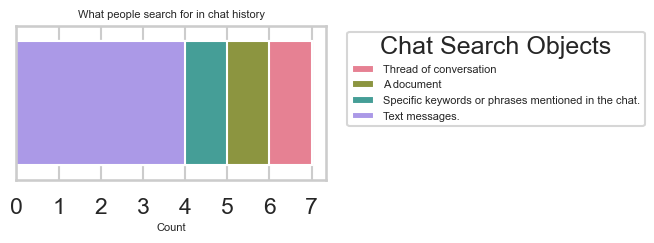

In [89]:


# Chat_Search_Objects = data['Chat Search Objects'].str.split(';', expand=True).stack().value_counts()
# ax = sns.barplot(x=Chat_Search_Objects.index, y=Chat_Search_Objects.values)
# ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
# # sns.barplot(x=Applications_counts.index, y=Applications_counts.values)
# plt.xticks(rotation=90,fontsize=9)
# plt.xlabel('Chat Search Objects', fontsize=10)
# plt.ylabel('Count')
# plt.title('What people search for in chat history')
# plt.show()

Chat_Search_Objects = data['Chat Search Objects'].str.split(';', expand=True).stack().value_counts()

# Create an empty plot
fig, ax = plt.subplots(figsize=(4,2))

# Plot each bar individually and add it to the legend, using a unique color for each
colors = sns.color_palette('husl', len(Chat_Search_Objects))
for i, (index, value) in enumerate(Chat_Search_Objects.items()):
    sns.barplot(x=[value], y=[i], ax=ax, label=index, color=colors[i], orient='h',)

# X-axis settings
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xlabel('Count', fontsize=8)

# Remove y-ticks and y-labels
ax.set_yticks([])
ax.set_ylabel('')

# Title
plt.title('What people search for in chat history', fontsize=8)

# Add a legend with a title
plt.legend(title='Chat Search Objects', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=8)

# Show the plot
plt.show()




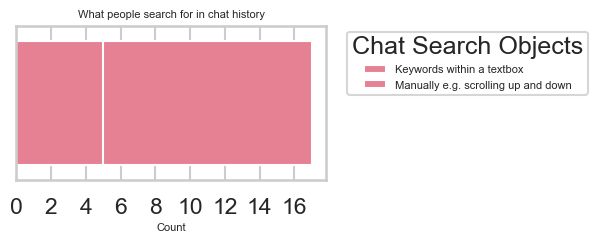

In [95]:
# Search_Methods = data['Search Methods'].str.split(';', expand=True).stack().value_counts()
# ax = sns.barplot(x=Search_Methods.index, y=Search_Methods.values)
# ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
# plt.xticks(rotation=90)
# plt.xlabel('Search Methods')
# plt.ylabel('Count')
# plt.title('Methods used to Search Historical Chat Conversations')
# plt.legend(title='Search Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

Search_Methods = data['Search Methods'].str.split(';', expand=True).stack().value_counts()

# Create an empty plot
fig, ax = plt.subplots(figsize=(4,2))

# Plot each bar individually and add it to the legend, using a unique color for each
colors = sns.color_palette('husl', len(Chat_Search_Objects))
for i, (index, value) in enumerate(Search_Methods.items()):
    sns.barplot(x=[value], y=[i], ax=ax, label=index, color=colors[i], orient='h')

# X-axis settings
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xlabel('Count', fontsize=8)

# Remove y-ticks and y-labels
ax.set_yticks([])
ax.set_ylabel('')

# Title
plt.title('What people search for in chat history', fontsize=8)

# Add a legend with a title
plt.legend(title='Chat Search Objects', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=8)

# Show the plot
plt.show()



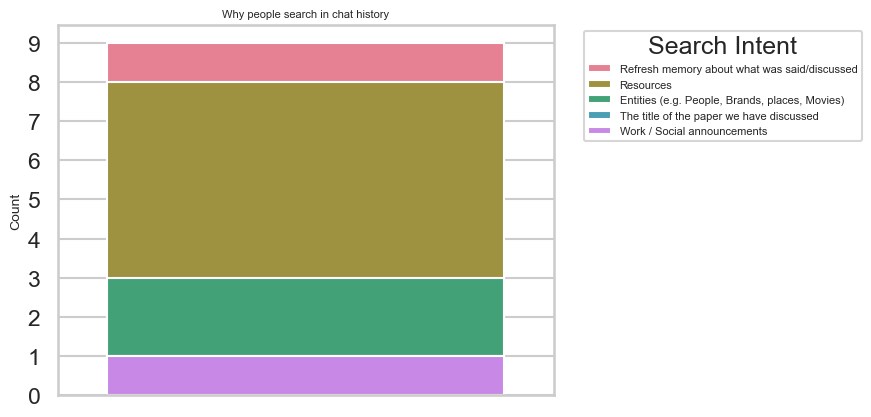

In [43]:
# Search_Intent = data['Search Intent'].str.split(';', expand=True).stack().value_counts()
# ax = sns.barplot(x=Search_Intent.index, y=Search_Intent.values)
# ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
# # sns.barplot(x=Applications_counts.index, y=Applications_counts.values)
# plt.xticks(rotation=90)
# plt.xlabel('Search Intent')
# plt.ylabel('Count')
# plt.title('Why people usually search through chat Apps')
# plt.show()

Search_Intent = data['Search Intent'].str.split(';', expand=True).stack().value_counts()

# Create an empty plot
fig, ax = plt.subplots()

# Plot each bar individually and add it to the legend
colors = sns.color_palette('husl', len(Search_Intent))
for i, (index, value) in enumerate(Search_Intent.items()):
    sns.barplot(x=[i], y=[value], ax=ax, label=index, color=colors[i])
# Remove x-ticks and x-labels
ax.set_xticks([])
ax.set_xlabel('')

# Y-axis settings
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylabel('Count', fontsize=10)

# Title
plt.title('Why people search in chat history', fontsize=8)

# Add a legend with a title
plt.legend(title='Search Intent', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# Show the plot
plt.show()

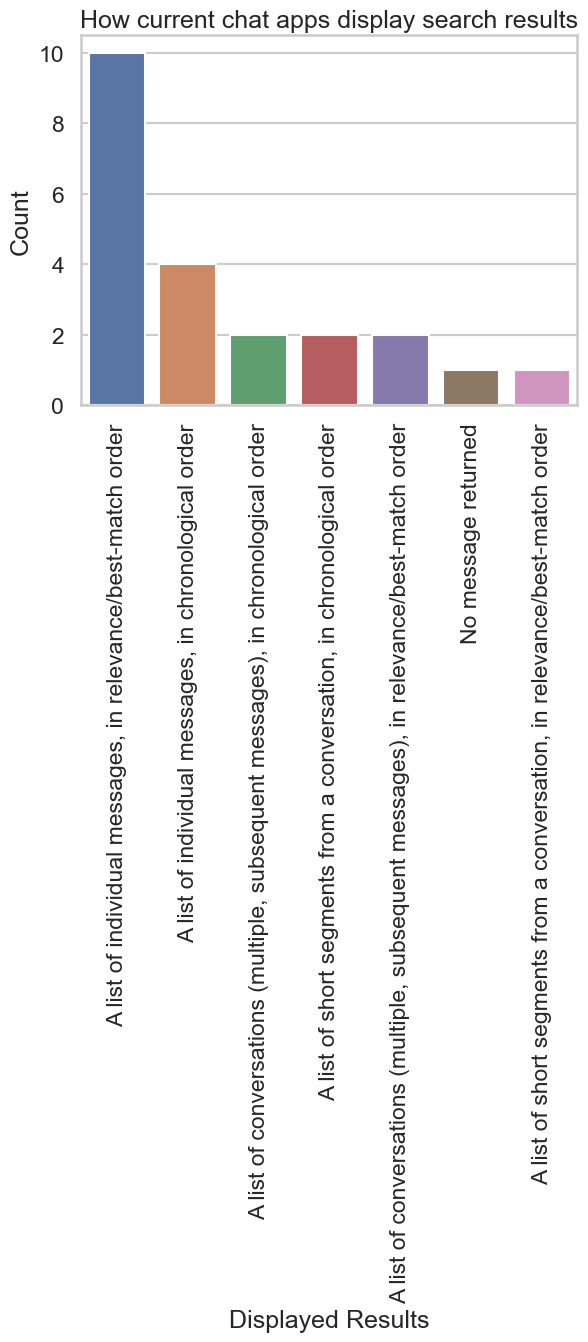

In [82]:
Displayed_Results = data['Displayed Results'].str.split(';', expand=True).stack().value_counts()
ax = sns.barplot(x=Displayed_Results.index, y=Displayed_Results.values)
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(rotation=90)
plt.xlabel('Displayed Results')
plt.ylabel('Count')
plt.title('How current chat apps display search results')
plt.show()

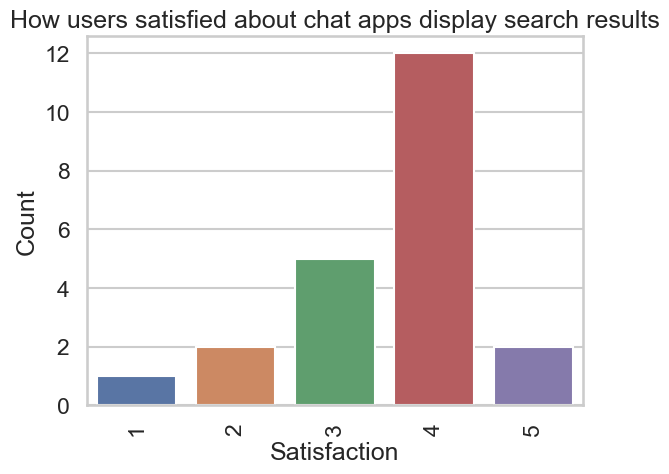

In [83]:
Displayed_Results = data['Result Display User Satisfaction'].value_counts()
Sorted_Displayed_Results=Displayed_Results.sort_values()
ax = sns.barplot(x=Sorted_Displayed_Results.index, y=Sorted_Displayed_Results.values)
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(rotation=90)
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.title('How users satisfied about chat apps display search results')
plt.show()


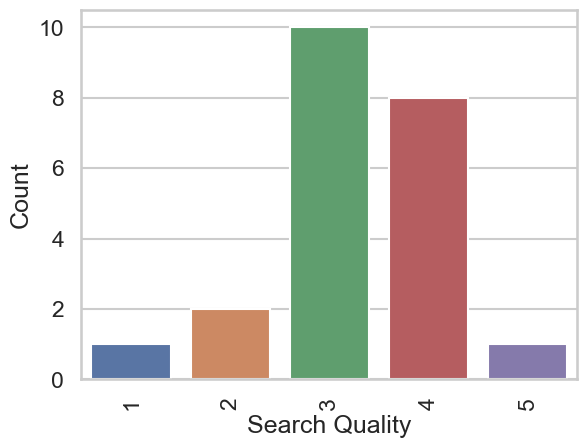

In [84]:
Search_Quality = data['Search Quality'].value_counts()
ax = sns.barplot(x=Search_Quality.index, y=Search_Quality.values)
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(rotation=90)
plt.xlabel('Search Quality')
plt.ylabel('Count')
plt.title('')
plt.show()

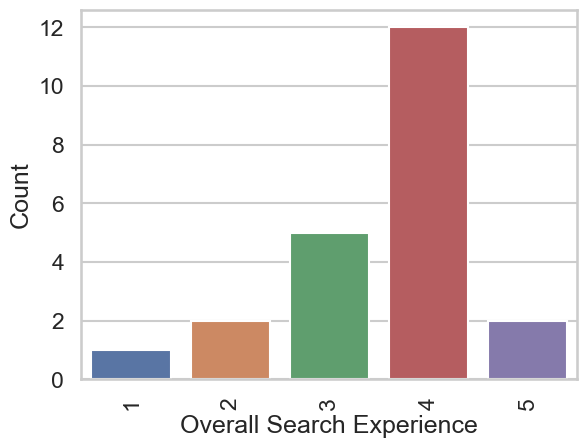

In [85]:
Search_Experience = data['Search Experience'].value_counts()
ax = sns.barplot(x=Search_Experience.index, y=Search_Experience.values)
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(rotation=90)
plt.xlabel('Overall Search Experience')
plt.ylabel('Count')
plt.title('')
plt.show()